# Biomedical Data Science HW1

## Dataset Description
The dataset contains expression levels of 2000 genes taken in 62 different samples. For each sample, it is indicated whether it came from a tumor biopsy or not (0/1). The first column is label. Gene.txt describe the genes and tissues.

In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
# Load Dataset in Panda Dataframe then convert to Numpy Arrays
Dataset = pd.read_csv('HW3Data.csv',header=None).as_matrix()
Features = Dataset[:,1:].copy()
Label = Dataset[:,0].copy()

## Hold Out
The hold-out must be done before feature selection. 20% of the data will be kept as testing dataset

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Label, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(49, 2000)
(13, 2000)


In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Recursive Feature Elimination with Cross-validation
We will use Support Vector Classifier for the Recursive Feature Elimination

Optimal number of features: 35


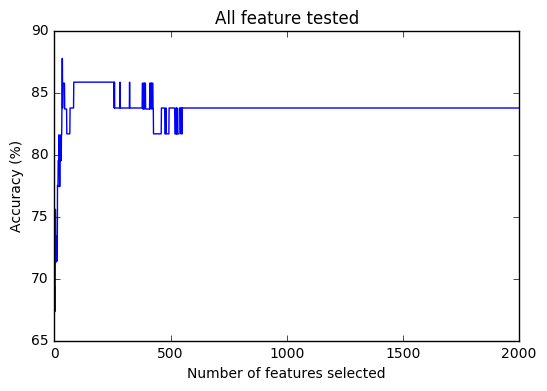

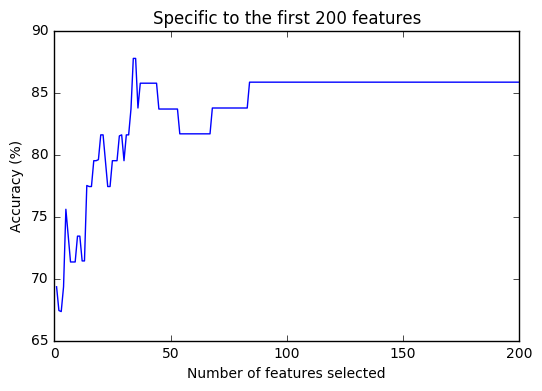

In [93]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

svc = SVC(kernel='linear')
rfecv = RFECV(estimator=svc, step=1, cv=2, scoring='accuracy')
rfecv.fit(X_train, y_train)

print("Optimal number of features: %d" % rfecv.n_features_)

plt.figure()
plt.title("All feature tested")
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy (%)")
plt.plot(range(1,len(rfecv.grid_scores_)+1), rfecv.grid_scores_*100)
plt.show()

plt.figure()
plt.title("Specific to the first 200 features")
plt.xlabel("Number of features selected")
plt.ylabel("Accuracy (%)")
plt.plot(range(1,200+1), rfecv.grid_scores_[:200]*100)
plt.show()

## Testing with HoldOut

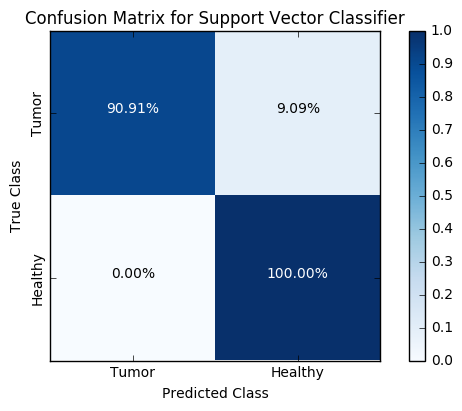

In [86]:
from sklearn.metrics import confusion_matrix
import itertools

svc.fit(X_train[:,rfecv.support_],y_train)
predictedOutput = svc.predict(X_test[:,rfecv.support_])

cm = confusion_matrix(y_test, predictedOutput)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.clf()
plt.imshow(cm,interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Support Vector Classifier')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Tumor','Healthy'])
plt.yticks(tick_marks, ['Tumor','Healthy'], rotation=90)
threshold = cm.max() / 2.

for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,"%.2f%%" % (cm[i,j]*100),horizontalalignment='center',color="white" if cm[i,j] > threshold else "black")

plt.tight_layout()
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()